In [1]:
# Task 2: Quorum sensing of Vibrio fischeri

# Building a Boolean Network

from colomoto.minibn import BooleanNetwork

f = BooleanNetwork()

This notebook has been executed using the docker image `colomoto/colomoto-docker:2019-12-19`

In [15]:
# Boolean functions

LuxR, AI, LuxR_AI, LuxR_AI_genome, LuxI = f.vars("LR", "AI", "RA", "RAG", "LI")

f[LuxR] = ~LuxR_AI_genome | LuxR_AI
f[AI] = LuxR_AI | LuxI
f[LuxR_AI] = (LuxR & AI) | LuxR_AI_genome
f[LuxR_AI_genome] = LuxR_AI
f[LuxI] = LuxR_AI_genome

f

AI <- RA|LI
LI <- RAG
LR <- !RAG|RA
RA <- (LR&AI)|RAG
RAG <- RA

In [16]:
# for the visualization of lists of states

import pandas as pd
import biolqm
lqm = f.to_biolqm()

In [11]:
# Deterministic simulations

import pypint

an = biolqm.to_pint(lqm)

fps = biolqm.fixpoints(lqm)
fixpoints = pd.DataFrame(fps)
attractors_list = []
basin_attraction = []

for x in range(0, 32):
    bitcode = format(x, '05b')[::-1]
    initString = "-u synchronous -m 50 -i " + bitcode
    #print(initString)
    trace = biolqm.trace(lqm, initString)
    df = pd.DataFrame( [s for s in trace] )
    print('\033[1m' + "Initial State " + str(x) + '\033[0m')
    print("\n")
    
    ini = an.having(LR=int(bitcode[2]),AI=int(bitcode[0]), RA=int(bitcode[3]), RAG=int(bitcode[4]), LI=int(bitcode[1]))
    print(ini.initial_state, '\n')
    print(df)
    print("\n")
  
    attractors = ini.reachable_attractors()
    print('Attractor(s):\n', attractors)
    print("\n")
    ini.reachable_stategraph()
    
    for a in attractors:
        if a in attractors_list:
            index = attractors_list.index(a)
            basin_attraction[index].append(ini.initial_state)
        else:
            attractors_list.append(a) 
            sublist = []
            sublist.append(ini.initial_state)
            basin_attraction.append(sublist)
    

Initial State 0


{'AI': 0, 'LI': 0, 'LR': 0, 'RA': 0, 'RAG': 0} 

   AI  LI  LR  RA  RAG
0   0   0   0   0    0
1   0   0   1   0    0


Attractor(s):
 [{'type': 'fixpoint', 'size': 1, 'sample': {'AI': 0, 'LI': 0, 'LR': 1, 'RA': 0, 'RAG': 0}}]


Initial State 1


{'AI': 1, 'LI': 0, 'LR': 0, 'RA': 0, 'RAG': 0} 

   AI  LI  LR  RA  RAG
0   1   0   0   0    0
1   0   0   1   0    0


Attractor(s):
 [{'type': 'fixpoint', 'size': 1, 'sample': {'AI': 0, 'LI': 0, 'LR': 1, 'RA': 0, 'RAG': 0}}, {'type': 'fixpoint', 'size': 1, 'sample': {'AI': 1, 'LI': 1, 'LR': 1, 'RA': 1, 'RAG': 1}}]


Initial State 2


{'AI': 0, 'LI': 1, 'LR': 0, 'RA': 0, 'RAG': 0} 

   AI  LI  LR  RA  RAG
0   0   1   0   0    0
1   1   0   1   0    0
2   0   0   1   1    0
3   1   0   1   0    1
4   0   1   0   1    0
5   1   0   1   0    1


Attractor(s):
 [{'type': 'fixpoint', 'size': 1, 'sample': {'AI': 0, 'LI': 0, 'LR': 1, 'RA': 0, 'RAG': 0}}, {'type': 'fixpoint', 'size': 1, 'sample': {'AI': 1, 'LI': 1, 'LR': 1, 'RA': 1,

In [13]:
# Possible attractors

for at in range(len(attractors_list)):
    print('Attractor ', at+1, ':\n')
    print(attractors_list[at])
    print('\n')

Attractor  1 :

{'type': 'fixpoint', 'size': 1, 'sample': {'AI': 0, 'LI': 0, 'LR': 1, 'RA': 0, 'RAG': 0}}


Attractor  2 :

{'type': 'fixpoint', 'size': 1, 'sample': {'AI': 1, 'LI': 1, 'LR': 1, 'RA': 1, 'RAG': 1}}




In [14]:
# Basin of attraction

for b in range(len(basin_attraction)):
    print('Attractor ', b+1, ' - Basin of attraction:\n')
    print('\n'.join([ str(myelement) for myelement in basin_attraction[b] ]))
    print('\n\n')

Attractor  1  - Basin of attraction:

{'AI': 0, 'LI': 0, 'LR': 0, 'RA': 0, 'RAG': 0}
{'AI': 1, 'LI': 0, 'LR': 0, 'RA': 0, 'RAG': 0}
{'AI': 0, 'LI': 1, 'LR': 0, 'RA': 0, 'RAG': 0}
{'AI': 1, 'LI': 1, 'LR': 0, 'RA': 0, 'RAG': 0}
{'AI': 0, 'LI': 0, 'LR': 1, 'RA': 0, 'RAG': 0}
{'AI': 1, 'LI': 0, 'LR': 1, 'RA': 0, 'RAG': 0}
{'AI': 0, 'LI': 1, 'LR': 1, 'RA': 0, 'RAG': 0}
{'AI': 1, 'LI': 1, 'LR': 1, 'RA': 0, 'RAG': 0}
{'AI': 0, 'LI': 0, 'LR': 0, 'RA': 1, 'RAG': 0}
{'AI': 1, 'LI': 0, 'LR': 0, 'RA': 1, 'RAG': 0}
{'AI': 0, 'LI': 1, 'LR': 0, 'RA': 1, 'RAG': 0}
{'AI': 1, 'LI': 1, 'LR': 0, 'RA': 1, 'RAG': 0}
{'AI': 0, 'LI': 0, 'LR': 1, 'RA': 1, 'RAG': 0}
{'AI': 0, 'LI': 1, 'LR': 1, 'RA': 1, 'RAG': 0}
{'AI': 0, 'LI': 0, 'LR': 0, 'RA': 0, 'RAG': 1}
{'AI': 1, 'LI': 0, 'LR': 0, 'RA': 0, 'RAG': 1}
{'AI': 0, 'LI': 1, 'LR': 0, 'RA': 0, 'RAG': 1}
{'AI': 1, 'LI': 1, 'LR': 0, 'RA': 0, 'RAG': 1}
{'AI': 0, 'LI': 0, 'LR': 1, 'RA': 0, 'RAG': 1}
{'AI': 1, 'LI': 0, 'LR': 1, 'RA': 0, 'RAG': 1}
{'AI': 0, 'LI': 1, 'LR

In [8]:
# Getting the number of fixpoints in the network

fps = biolqm.fixpoints(lqm)
print(len(fps), "fixpoints")

2 fixpoints


In [10]:
# Visualize the fixpoints

lqm = f.to_biolqm()
from colomoto_jupyter import tabulate
tabulate(biolqm.fixpoints(lqm))

<table>
<thead>
<tr><th style="text-align: right;">  </th><th style="text-align: right;">  AI</th><th style="text-align: right;">  LI</th><th style="text-align: right;">  LR</th><th style="text-align: right;">  RA</th><th style="text-align: right;">  RAG</th></tr>
</thead>
<tbody>
<tr><td style="text-align: right;"> 0</td><td style="text-align: right;">   0</td><td style="text-align: right;">   0</td><td style="text-align: right;">   1</td><td style="text-align: right;">   0</td><td style="text-align: right;">    0</td></tr>
<tr><td style="text-align: right;"> 1</td><td style="text-align: right;">   1</td><td style="text-align: right;">   1</td><td style="text-align: right;">   1</td><td style="text-align: right;">   1</td><td style="text-align: right;">    1</td></tr>
</tbody>
</table>

In [21]:
# Create a model graph

import ginsim
biolqm.save(lqm, "qsmodel.ginml", "ginml")

'qsmodel.ginml'

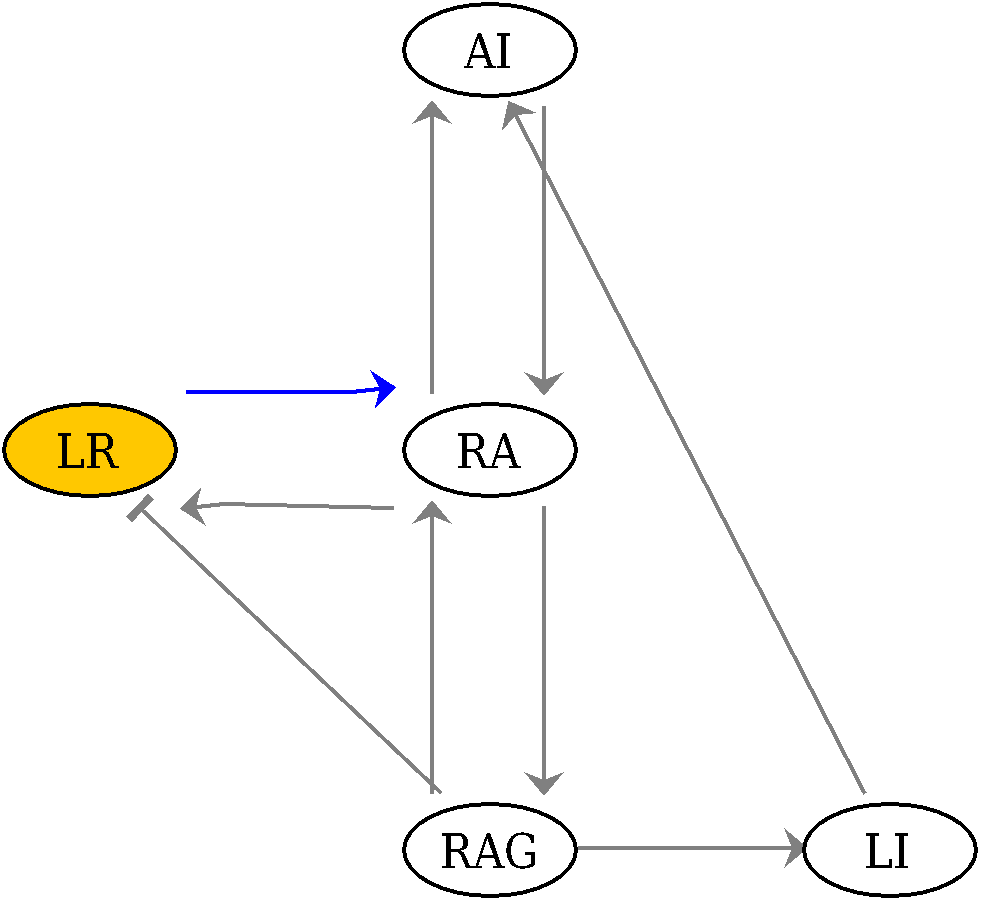

In [22]:
# Change the 'qsmodel.ginml' code in the Library

lrg = ginsim.load("qsmodel.ginml")
ginsim.show(lrg, fps[0])